# IMDB Review Classification

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Remap an integer sequence to the original text

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])
decoded = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## One Hot encode the integer sequences

In [4]:
def vectorize_seqeuences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [5]:
x_train = vectorize_seqeuences(train_data)
x_test = vectorize_seqeuences(test_data)

## Convert Labels to Numpy Arrays

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build the Neural Network Model

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Create a Validation Set

In [8]:
x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.5083 - acc: 0.7821 - val_loss: 0.3789 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.3002 - acc: 0.9047 - val_loss: 0.3001 - val_acc: 0.8902
Epoch 3/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.2178 - acc: 0.9282 - val_loss: 0.3082 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1750 - acc: 0.9435 - val_loss: 0.2840 - val_acc: 0.8836
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1425 - acc: 0.9543 - val_loss: 0.2849 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.3175 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0979 - acc: 0.9709 - val_loss: 0.3127 - v

## Visualize Metrics

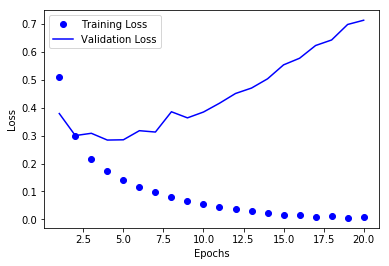

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
plt.clf()

<Figure size 432x288 with 0 Axes>

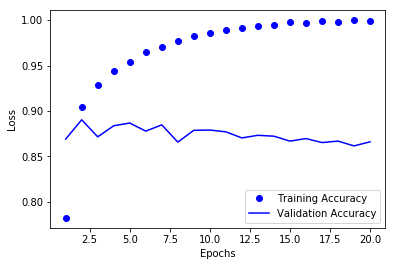

In [12]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Test the Model

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.5110 - acc: 0.7963
Epoch 2/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2734 - acc: 0.9062
Epoch 3/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2005 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 1s 43us/step


In [19]:
results

[0.31207827342033384, 0.8902]

In [17]:
model.predict(x_test)

array([[0.12624522],
       [0.96679485],
       [0.9384259 ],
       ...,
       [0.07864324],
       [0.09003808],
       [0.6147797 ]], dtype=float32)